In [30]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

basicInfo = pd.read_excel("A股基本资料.xlsx")
industry = pd.read_excel("industry.xlsx")
toptenholders = pd.read_excel("toptenholders.xlsx")
possiblePrice = pd.read_excel("估值.xlsx")
holderNum = pd.read_excel("股东户数资料.xlsx")

mainTable = pd.merge(basicInfo, industry, on="证券简称")
mainTable = pd.merge(mainTable, toptenholders, on="证券简称")
mainTable = pd.merge(mainTable, possiblePrice, on="证券简称")
mainTable = pd.merge(mainTable, holderNum, on="证券简称")
mainTable = mainTable[mainTable.省份 == "广东省"]

infoTable = mainTable[["证券简称" ,"公司属性", "城市", "所属行业名称_x000D_\n[行业标准] Wind行业_x000D_\n[行业级别] 全部明细", "总市值1_x000D_\n[交易日期] 最新_x000D_\n[单位] 元", "市盈率PE(TTM)_x000D_\n[交易日期] 最新_x000D_\n[单位] 倍", "主营产品名称", "主营产品类型"]]
infoTable.columns = ["证券简称" ,"公司属性", "城市", "Wind行业", "总市值", "市盈率PE(TTM)", "主营产品", "主营产品类型"]
infoTable["Wind行业"] = infoTable["Wind行业"].apply(lambda x: x.split("--")[1] if True else 0)
holdersTable = mainTable[["证券简称", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第1名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第2名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第3名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第4名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第5名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第6名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第7名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第8名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第9名", "大股东名称_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第10名"]]
holdPercent = mainTable[["证券简称", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第1名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第2名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第3名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第4名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第5名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第6名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第7名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第8名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第9名_x000D_\n[单位] %", "大股东持股比例_x000D_\n[日期] 最新_x000D_\n[大股东排名] 第10名_x000D_\n[单位] %"]]
holdersTable.columns = ["name","h1","h2","h3","h4","h5","h6","h7","h8","h9","h10"]
holdPercent.columns = ["name","p1","p2","p3","p4","p5","p6","p7","p8","p9","p10"]

C:\Users\10897\AppData\Local\Temp/ipykernel_6816/2799424782.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'证券代码_x'} in the result is deprecated and will raise a MergeError in a future version.
  mainTable = pd.merge(mainTable, possiblePrice, on="证券简称")
C:\Users\10897\AppData\Local\Temp/ipykernel_6816/2799424782.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infoTable["Wind行业"] = infoTable["Wind行业"].apply(lambda x: x.split("--")[1] if True else 0)


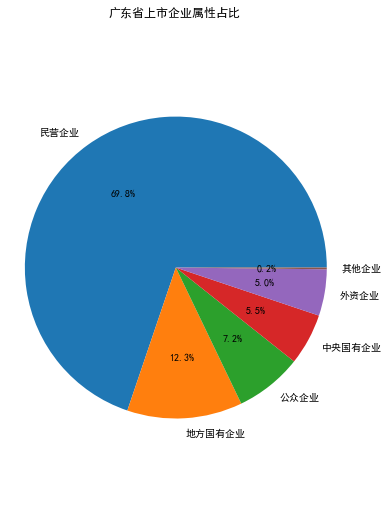

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  
gssx=infoTable["公司属性"]
gssxc=pd.value_counts(gssx)
labss=pd.Series(gssxc.index).values 
plt.figure(figsize=(6,9)) 
plt.pie(gssxc,labels=labss,autopct = '%3.1f%%')
plt.title("广东省上市企业属性占比")
plt.axis('equal') 
plt.show()

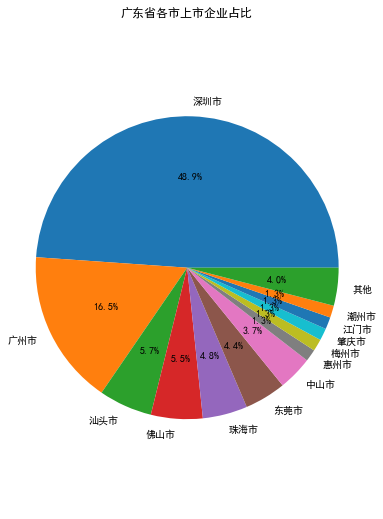

In [5]:
gscs=infoTable["城市"]
gscsc=pd.value_counts(gscs)
plt.figure(figsize=(6,9))

less1 = []
total = sum(gscsc)
for index in range(len(gscsc)):
    if (gscsc[index] / total) < 0.01:
        less1 = gscsc[index:]
        gscsc = gscsc[:index].append(pd.Series(sum(less1),["其他"]))
        break
        
labss=pd.Series(gscsc.index).values
plt.pie(gscsc,labels=labss,autopct = '%3.1f%%')
plt.title("广东省各市上市企业占比")
plt.axis('equal') 
plt.show()

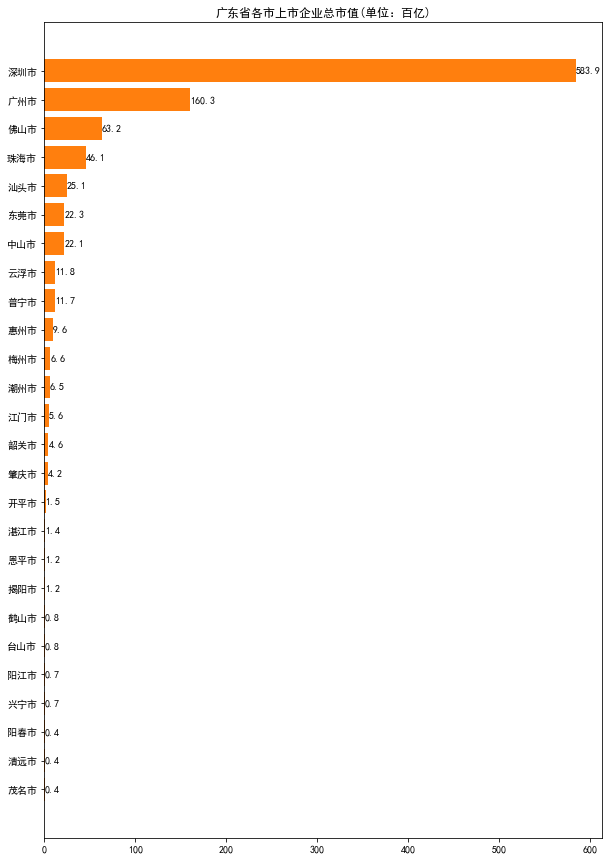

In [6]:
namePrice=infoTable[["城市", "总市值"]].groupby(["城市"])["总市值"].sum().sort_values(ascending=True)
name = namePrice.index.values
price = namePrice.values / 10000000000
for index in range(len(price)):
    price[index] = round(price[index], 1)
plt.figure(figsize=(10,15),constrained_layout=False)
plt.barh(name, price)
plt.bar_label(plt.barh(name, price), price, label_type = "edge")
plt.title("广东省各市上市企业总市值(单位：百亿)")
plt.show()

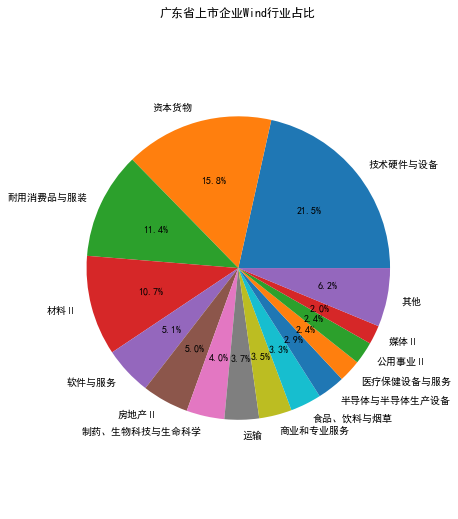

In [7]:
wind=infoTable["Wind行业"]
windc=pd.value_counts(wind)
plt.figure(figsize=(6,9))

less2 = []
total = sum(windc)
for index in range(len(windc)):
    if (windc[index] / total) < 0.02:
        less2 = windc[index:]
        windc = windc[:index].append(pd.Series(sum(less2),["其他"]))
        break
        
labss=pd.Series(windc.index).values
plt.pie(windc,labels=labss,autopct = '%3.1f%%')
plt.title("广东省上市企业Wind行业占比")
plt.axis('equal') 
plt.show()

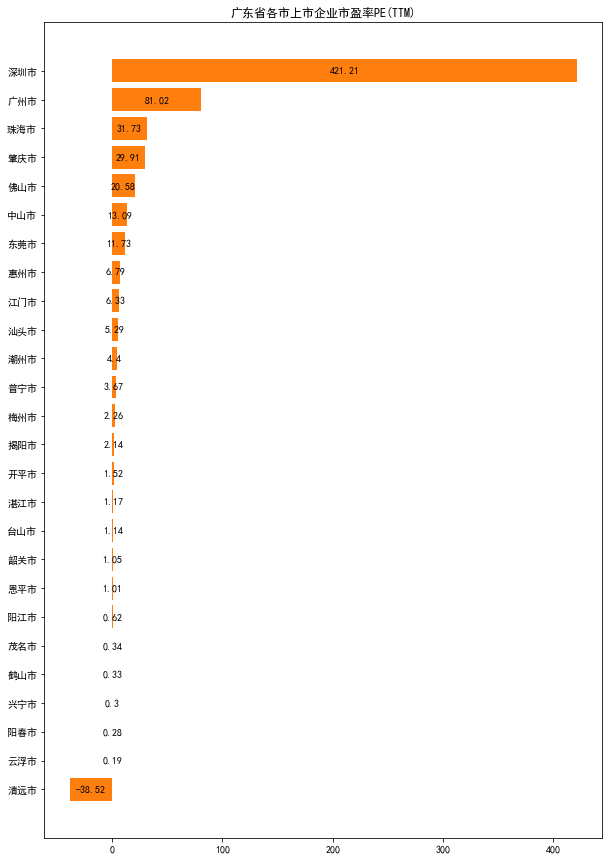

In [8]:
namePrice=infoTable[["城市", "市盈率PE(TTM)"]].groupby(["城市"])["市盈率PE(TTM)"].sum().sort_values(ascending=True)
name = namePrice.index.values
price = namePrice.values / 100
for index in range(len(price)):
    price[index] = round(price[index],2)
plt.figure(figsize=(10,15),constrained_layout=False)
plt.barh(name, price)
plt.title("广东省各市上市企业市盈率PE(TTM)")
plt.bar_label(plt.barh(name, price), price, label_type = "center")
plt.show()

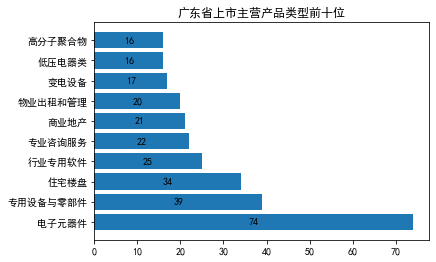

In [9]:
productType=infoTable["主营产品类型"].values
product = []
for data1 in productType:
    for data2 in data1.split("、"):
        product.append(data2)
product = pd.value_counts(product)[:10]
plt.figure(constrained_layout=False)
plt.title("广东省上市主营产品类型前十位")
plt.bar_label(plt.barh(product.index, product), product, label_type = "center")
plt.show()

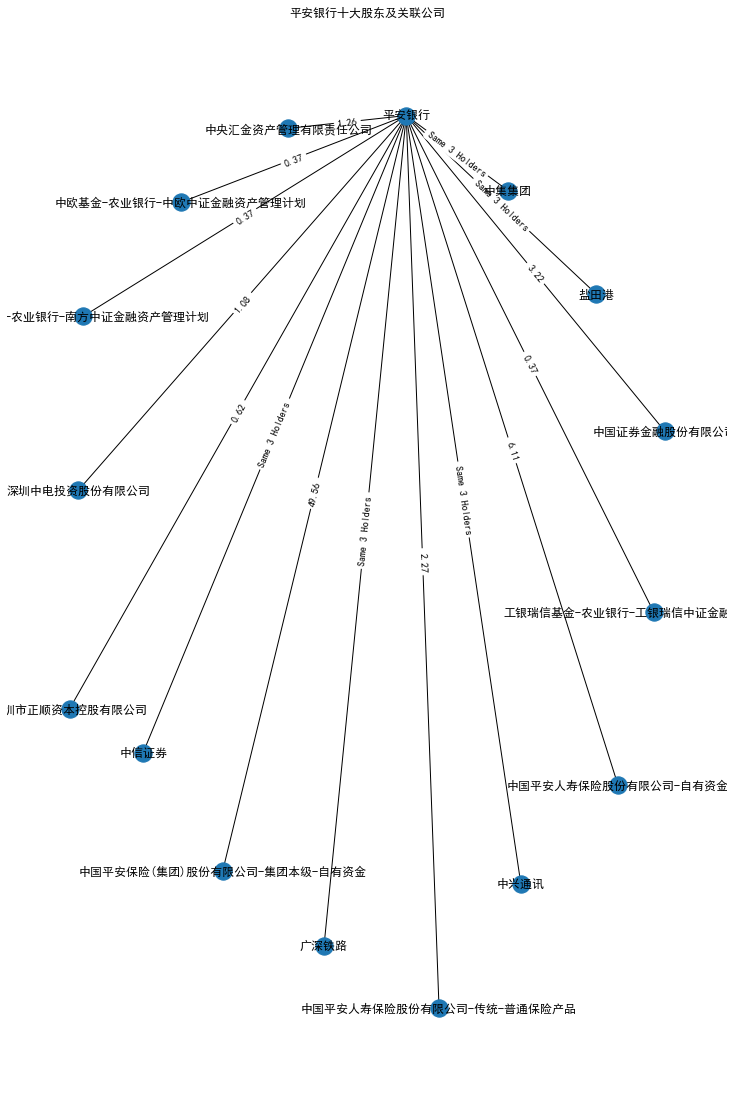

In [78]:
for upindex, uprow in holdersTable.iterrows():
    inputStock = uprow.values[0]
    holders = holdersTable[holdersTable.name == inputStock].values[0][1:]
    holdersPercent = holdPercent[holdPercent.name == inputStock].values[0][1:]

    publicHolders = []
    for index, row in holdersTable.iterrows():
        publicNum = 0
        if inputStock != row.values[0]:
            for holder in holders:
                if holder in row.values[1:]:
                    publicNum += 1
        if publicNum >= 3:
            publicHolders.append(row.values[0])

    privateHolder = pd.DataFrame({"Stock": inputStock, "Holder": holders, "Weight": holdersPercent})
    publicHolder = pd.DataFrame({"Stock": inputStock, "Holder": publicHolders, "Weight": "Same 3 Holders"})
    totalHolder = privateHolder.append(publicHolder)

    plt.figure(figsize=(10,15),constrained_layout=False)
    G = nx.from_pandas_edgelist(df = totalHolder, source = 'Stock', target='Holder', edge_attr='Weight')
    pos = nx.spring_layout(G, k=10)
    nx.draw(G, pos, with_labels=True)
    labels = {e: G.edges[e]['Weight'] for e in G.edges}
    G.add_edge(5,11)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(inputStock + "十大股东及关联公司")
    plt.show()
    break